<a href="https://colab.research.google.com/github/HarshitYadav-10/Fruit-Vegetable-Recognition/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing the dataset
!pip install kaggle


In [14]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import zipfile
import io



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! mkdir ~/.kaggle

In [6]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download kritikseth/fruit-and-vegetable-image-recognition

100% 1.98G/1.98G [00:30<00:00, 46.9MB/s]
100% 1.98G/1.98G [00:30<00:00, 69.3MB/s]


In [16]:
!unzip fruit-and-vegetable-image-recognition.zip

Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  
  inflati

In [17]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


In [18]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


In [19]:
cnn = tf.keras.models.Sequential()

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [21]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [23]:
cnn.add(tf.keras.layers.Dropout(0.25))


In [24]:
cnn.add(tf.keras.layers.Flatten())

In [25]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [26]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [27]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [28]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [29]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [31]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 151s 1s/step - loss: 5.5571 - accuracy: 0.0212 - val_loss: 3.5826 - val_accuracy: 0.0228
Epoch 2/32
98/98 [==============================] - 159s 2s/step - loss: 3.5798 - accuracy: 0.0315 - val_loss: 3.5669 - val_accuracy: 0.0456
Epoch 3/32
98/98 [==============================] - 146s 1s/step - loss: 3.5703 - accuracy: 0.0356 - val_loss: 3.5761 - val_accuracy: 0.0370
Epoch 4/32
98/98 [==============================] - 135s 1s/step - loss: 3.5435 - accuracy: 0.0539 - val_loss: 3.4703 - val_accuracy: 0.1168
Epoch 5/32
98/98 [==============================] - 137s 1s/step - loss: 3.4894 - accuracy: 0.0681 - val_loss: 3.3129 - val_accuracy: 0.1624
Epoch 6/32
98/98 [==============================] - 152s 2s/step - loss: 3.4044 - accuracy: 0.0803 - val_loss: 3.0965 - val_accuracy: 0.1852
Epoch 7/32
98/98 [==============================] - 146s 1s/step - loss: 3.2640 - accuracy: 0.1136 - val_loss: 2.8762 - val_accuracy: 0.2650
Epoch 8/32
98

In [32]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 82s 771ms/step - loss: 0.1810 - accuracy: 0.9490
Training accuracy: 0.9489566683769226


In [33]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 12s 395ms/step - loss: 0.6617 - accuracy: 0.9117
Validation accuracy: 0.9116809368133545


In [34]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
training_history.history

{'loss': [5.557065010070801,
  3.5797793865203857,
  3.570331573486328,
  3.5435101985931396,
  3.489398956298828,
  3.404419422149658,
  3.264026403427124,
  3.09999680519104,
  2.864046812057495,
  2.712876796722412,
  2.4517338275909424,
  2.2456276416778564,
  2.0140702724456787,
  1.7993311882019043,
  1.5875627994537354,
  1.4466893672943115,
  1.3077495098114014,
  1.159666895866394,
  1.0613093376159668,
  1.0204875469207764,
  0.9649362564086914,
  0.8678021430969238,
  0.7744444012641907,
  0.831775963306427,
  0.752916693687439,
  0.6827402114868164,
  0.6182320713996887,
  0.5690104961395264,
  0.5413542985916138,
  0.5355528593063354,
  0.4538951516151428,
  0.4791644215583801],
 'accuracy': [0.02118780091404915,
  0.03146067261695862,
  0.035634029656648636,
  0.05393258482217789,
  0.06805778294801712,
  0.08025681972503662,
  0.11364366114139557,
  0.14542536437511444,
  0.19935794174671173,
  0.24365970492362976,
  0.29470303654670715,
  0.35922953486442566,
  0.424077

In [36]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [37]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [38]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 91.16809368133545 %


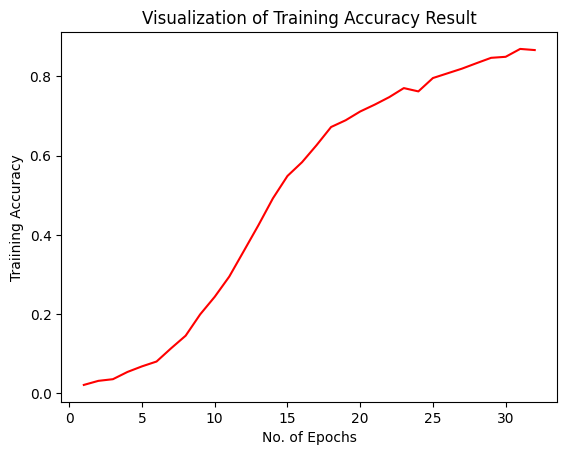

In [39]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

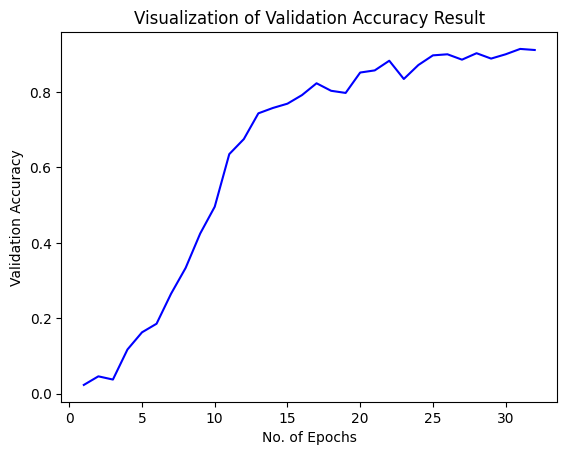

In [40]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [42]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [43]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 13s 357ms/step - loss: 0.6470 - accuracy: 0.9136
Test accuracy: 0.9136490225791931
